# Following https://www.dzialowski.eu/football-data-visualisations/ on how to get data and https://github.com/mckayjohns/ for how to make visualisation in football.



In [1]:
import pandas as pd
import numpy as np
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns
import matplotlib.patches as mpatches
pd.set_option('display.max_columns', None)
from highlight_text import fig_text
#Set general use colors
text_color = 'w'

In [2]:
allmbappe=pd.DataFrame()
i=np.arange(1396,1401)


In [3]:
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r',encoding='utf8')
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')
    for k in i:
        data_txt=data_txt.replace('\n</td></tr><tr><td class="line-number" value="'+ str(k) +'"></td><td class="line-content">',' ')
        data_txt=data_txt.replace('</td></tr><tr><td class="line-number" value="'+ str(k) + '"></td><td class="line-content"> ',' ')
        data_txt=data_txt.replace('\n</td></tr><tr><td class="line-number" value="'+str(k )+'"></td><td class="line-content"> ',' ')
    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

In [4]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [5]:
matches=['FraAus.html','FraDen.html','TunFra.html','FraPol.html','EngFra.html','FraMor.html','ArgFra.html']
event_list = ['SavedShot','MissedShots','Goal']
match_html_path = 'ArgFra.html'
for m in matches:
    path='matches/'+m
    json_data_txt = extract_json_from_html(path)
    #print(json_data_txt)
    data = json.loads(json_data_txt)
    events_dict, players_df, teams_dict = extract_data_from_dict(data)
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)
    df_mbappe=df[df['playerId']==300713]
    goal_ids= df.index[df['eventType'].isin(event_list)]
    df_shots = df.loc[goal_ids, ["id", "x", "y", "teamId", "playerId",  "eventType", "outcomeType","type"]]
    mbappe=df_shots[df_shots['playerId']==300713]
    allmbappe=pd.concat([allmbappe,mbappe])
allmbappe

,id,x,y,teamId,playerId,eventType,outcomeType,type
603,2.487227e+09,84.9,40.0,341,300713.0,MissedShots,Successful,"{'value': 13, 'displayName': 'MissedShots'}"
767,2.487230e+09,93.0,49.5,341,300713.0,MissedShots,Successful,"{'value': 13, 'displayName': 'MissedShots'}"
1141,2.487245e+09,89.6,59.2,341,300713.0,SavedShot,Successful,"{'value': 15, 'displayName': 'SavedShot'}"
1160,2.487246e+09,88.8,59.6,341,300713.0,SavedShot,Successful,"{'value': 15, 'displayName': 'SavedShot'}"
1191,2.487247e+09,88.3,69.3,341,300713.0,SavedShot,Successful,"{'value': 15, 'displayName': 'SavedShot'}"
1242,2.487248e+09,95.8,69.6,341,300713.0,MissedShots,Successful,"{'value': 13, 'displayName': 'MissedShots'}"
1246,2.487248e+09,95.2,49.3,341,300713.0,Goal,Successful,"{'value': 16, 'displayName': 'Goal'}"
692,2.487829e+09,86.1,46.7,341,300713.0,MissedShots,Successful,"{'value': 13, 'displayName': 'MissedShots'}"
778,2.487833e+09,78.1,75.6,341,300713.0,SavedShot,Successful,"{'value': 15, 'displayName': 'SavedShot'}"
999,2.487842e+09,86.4,67.8,341,300713.0,SavedShot,Successful,"{'value': 15, 'displayName': 'SavedShot'}"


In [6]:
players_df

,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
0,102248,23,Emiliano Martínez,GK,195,88,30,True,False,home,"{'totalSaves': {'101': 1.0, '139': 1.0}, 'parr...",NaN,NaN,NaN,NaN,NaN,NaN,346
1,303728,26,Nahuel Molina,DR,175,70,24,True,False,home,"{'possession': {'3': 1.0, '7': 1.0, '11': 1.0,...",316883.0,"{'value': 4, 'displayName': 'SecondPeriodOfExt...",106.0,NaN,NaN,NaN,346
2,75691,19,Nicolás Otamendi,DC,183,81,34,True,False,home,"{'possession': {'0': 2.0, '1': 3.0, '3': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
3,323663,13,Cristian Romero,DC,185,79,24,True,False,home,"{'possession': {'0': 2.0, '1': 2.0, '3': 3.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
4,83809,3,Nicolás Tagliafico,DL,172,66,30,True,False,home,"{'possession': {'0': 1.0, '4': 1.0, '11': 2.0,...",114863.0,"{'value': 15, 'displayName': 'PreGame'}",137.0,NaN,NaN,NaN,346
5,125547,7,Rodrigo De Paul,MC,180,70,28,True,False,home,"{'possession': {'0': 1.0, '2': 1.0, '3': 1.0, ...",93700.0,"{'value': 4, 'displayName': 'SecondPeriodOfExt...",117.0,NaN,NaN,NaN,346
6,345319,20,Alexis Mac Allister,MC,176,69,23,True,False,home,"{'possession': {'2': 1.0, '3': 2.0, '4': 2.0, ...",121456.0,"{'value': 15, 'displayName': 'PreGame'}",132.0,NaN,NaN,NaN,346
7,369430,24,Enzo Fernández,MC,178,76,21,True,False,home,"{'possession': {'3': 1.0, '4': 1.0, '7': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
8,11119,10,Lionel Messi,FWR,170,72,35,True,False,home,"{'possession': {'2': 2.0, '4': 1.0, '7': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
9,365409,9,Julián Álvarez,FW,170,71,22,True,False,home,"{'possession': {'4': 1.0, '7': 1.0, '13': 2.0,...",299344.0,"{'value': 4, 'displayName': 'SecondPeriodOfExt...",118.0,NaN,NaN,NaN,346


In [7]:
#mbappe=df_shots[df_shots['playerId']==300713]
allmbappe.drop(allmbappe.tail(1).index,inplace=True)
allmbappe

,id,x,y,teamId,playerId,eventType,outcomeType,type
603,2.487227e+09,84.9,40.0,341,300713.0,MissedShots,Successful,"{'value': 13, 'displayName': 'MissedShots'}"
767,2.487230e+09,93.0,49.5,341,300713.0,MissedShots,Successful,"{'value': 13, 'displayName': 'MissedShots'}"
1141,2.487245e+09,89.6,59.2,341,300713.0,SavedShot,Successful,"{'value': 15, 'displayName': 'SavedShot'}"
1160,2.487246e+09,88.8,59.6,341,300713.0,SavedShot,Successful,"{'value': 15, 'displayName': 'SavedShot'}"
1191,2.487247e+09,88.3,69.3,341,300713.0,SavedShot,Successful,"{'value': 15, 'displayName': 'SavedShot'}"
1242,2.487248e+09,95.8,69.6,341,300713.0,MissedShots,Successful,"{'value': 13, 'displayName': 'MissedShots'}"
1246,2.487248e+09,95.2,49.3,341,300713.0,Goal,Successful,"{'value': 16, 'displayName': 'Goal'}"
692,2.487829e+09,86.1,46.7,341,300713.0,MissedShots,Successful,"{'value': 13, 'displayName': 'MissedShots'}"
778,2.487833e+09,78.1,75.6,341,300713.0,SavedShot,Successful,"{'value': 15, 'displayName': 'SavedShot'}"
999,2.487842e+09,86.4,67.8,341,300713.0,SavedShot,Successful,"{'value': 15, 'displayName': 'SavedShot'}"


In [8]:
'''
allmbappe['x'] = allmbappe['x']*1.2
allmbappe['y'] = allmbappe['y']*.8
allmbappe'''

"\nallmbappe['x'] = allmbappe['x']*1.2\nallmbappe['y'] = allmbappe['y']*.8\nallmbappe"

findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.


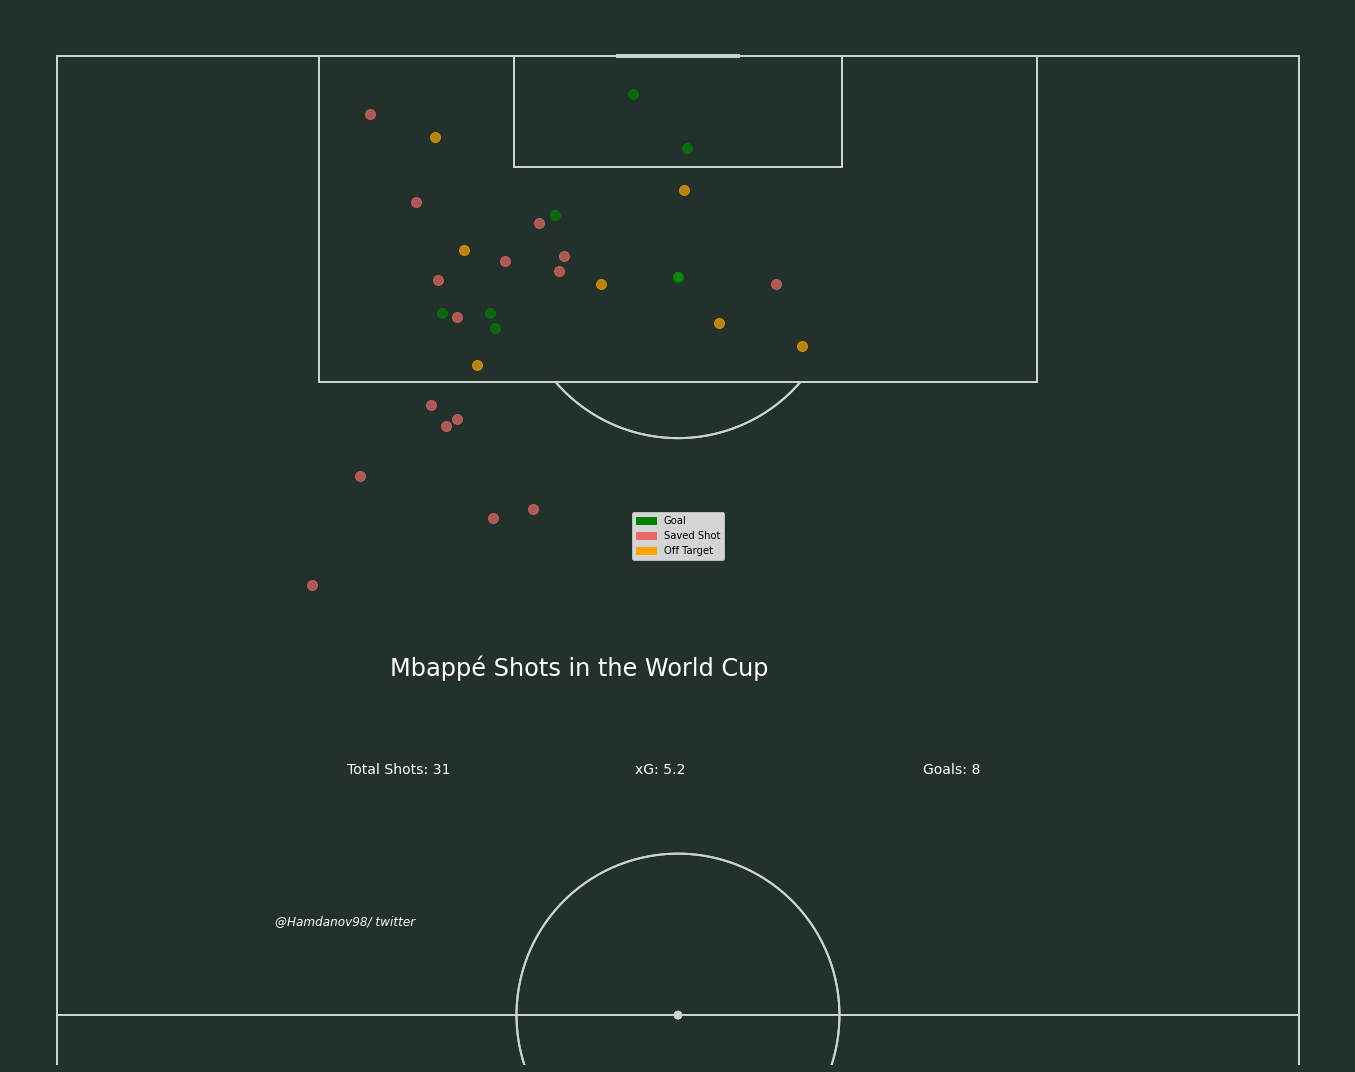

In [9]:
# Setup the pitch

pitch = VerticalPitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc',half=True)
fig, ax = pitch.draw(figsize=(20,15), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')
#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
#plt.gca().invert_xaxis()

#plot the points, you can use a for loop to plot the different outcomes if you want
#use a for loop to plot each shot
for i in range(len(allmbappe['x'])):
    if allmbappe['eventType'].iloc[i]=='Goal':
        plt.scatter(allmbappe['y'].iloc[i],allmbappe['x'].iloc[i], s=100,c='green',alpha=.7)
    if allmbappe['eventType'].iloc[i]=='SavedShot':
        plt.scatter(allmbappe['y'].iloc[i],allmbappe['x'].iloc[i], s=100,c='#ea6969',alpha=.7)
    if allmbappe['eventType'].iloc[i]=='MissedShots':
        plt.scatter(allmbappe['y'].iloc[i],allmbappe['x'].iloc[i], s=100,c='orange',alpha=.7)
        

s='Mbappé Shots in the World Cup'
fig_text(s=s,
        x=.30,y=.39,
        fontfamily='Andale Mono',
       
        fontsize=24,
        color=text_color

)

total_shots = len(allmbappe)

green_patch=mpatches.Patch(color='green',label='Goal')
red_patch = mpatches.Patch(color='#ea6969', label='Saved Shot')
orange_patch = mpatches.Patch(color='orange', label='Off Target')
ax.legend(handles=[green_patch,red_patch,orange_patch])
fig_text(s=f'Total Shots: {total_shots}',
        x=.27, y =.29, fontsize=14,fontfamily='Andale Mono',color=text_color)
fig_text(s=f'xG: 5.2',
        x=.47, y =.29, fontsize=14,fontfamily='Andale Mono',color=text_color)
fig_text(s=f'Goals: 8',
        x=.67, y =.29, fontsize=14,fontfamily='Andale Mono',color=text_color)


fig.text(.22,.14,f'@Hamdanov98/ twitter',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color=text_color)

plt.savefig('pics/mbappéshots.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')